In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

# Style functions
plt.style.use('ggplot')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)


In [2]:
file_path = "cannabis.csv"
canna_data = pd.read_csv(file_path)

In [3]:
canna_data.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [4]:
print(len(canna_data["Strain"].unique()))

2350


In [5]:
print(canna_data["Type"].unique())

['hybrid' 'sativa' 'indica']


In [6]:
canna_data["Rating"].describe()

count    2351.000000
mean        4.310634
std         0.836394
min         0.000000
25%         4.200000
50%         4.400000
75%         4.700000
max         5.000000
Name: Rating, dtype: float64

In [7]:
# Separate effects into columns to make data more useful
separated_effects = canna_data["Effects"].str.split(",", expand=True)
separated_effects.head()

# Add in separated descriptions to clean_item
canna_data["effect1"] = separated_effects[0]
canna_data["effect2"] = separated_effects[1]
canna_data["effect3"] = separated_effects[2]
canna_data["effect4"] = separated_effects[3]
canna_data["effect5"] = separated_effects[4]


In [8]:
# Separate flavors into columns to make data more useful
separated_flavor = canna_data["Flavor"].str.split(",", expand=True)
separated_flavor.head()

# Add in separated descriptions to clean_item
canna_data["flavor1"] = separated_flavor[0]
canna_data["flavor2"] = separated_flavor[1]
canna_data["flavor3"] = separated_flavor[2]
canna_data["flavor4"] = separated_flavor[3]

In [9]:
# Drop unneccessary columns
canna_data = canna_data.drop(columns=["Effects", "Flavor"])

# Clean column names - uniform formatting and clear titles
canna_data.columns = canna_data.columns.str.strip().str.lower()

canna_data.head()

,strain,type,rating,description,effect1,effect2,effect3,effect4,effect5,flavor1,flavor2,flavor3,flavor4
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [10]:
canna_data["type"].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [11]:
canna_data.to_csv('canna.csv', index=False) 

In [12]:
effect1 = canna_data["effect1"].tolist()
effect2 = canna_data["effect2"].tolist()
effect3 = canna_data["effect3"].tolist()
effect4 = canna_data["effect4"].tolist()
effect5 = canna_data["effect5"].tolist()

In [13]:
mood = effect1 + effect2 + effect3 + effect4 + effect5

In [14]:
mood_df = pd.DataFrame({"Mood":mood, "Count":mood})

In [15]:
mood_df = mood_df.groupby("Mood").count().sort_values(["Count"], ascending=True)

In [16]:
mood_df = mood_df.drop(index="None")
moodlist = mood_df.index.tolist()

In [17]:
# total mood occurances
mood_df["Count"].sum()

11149

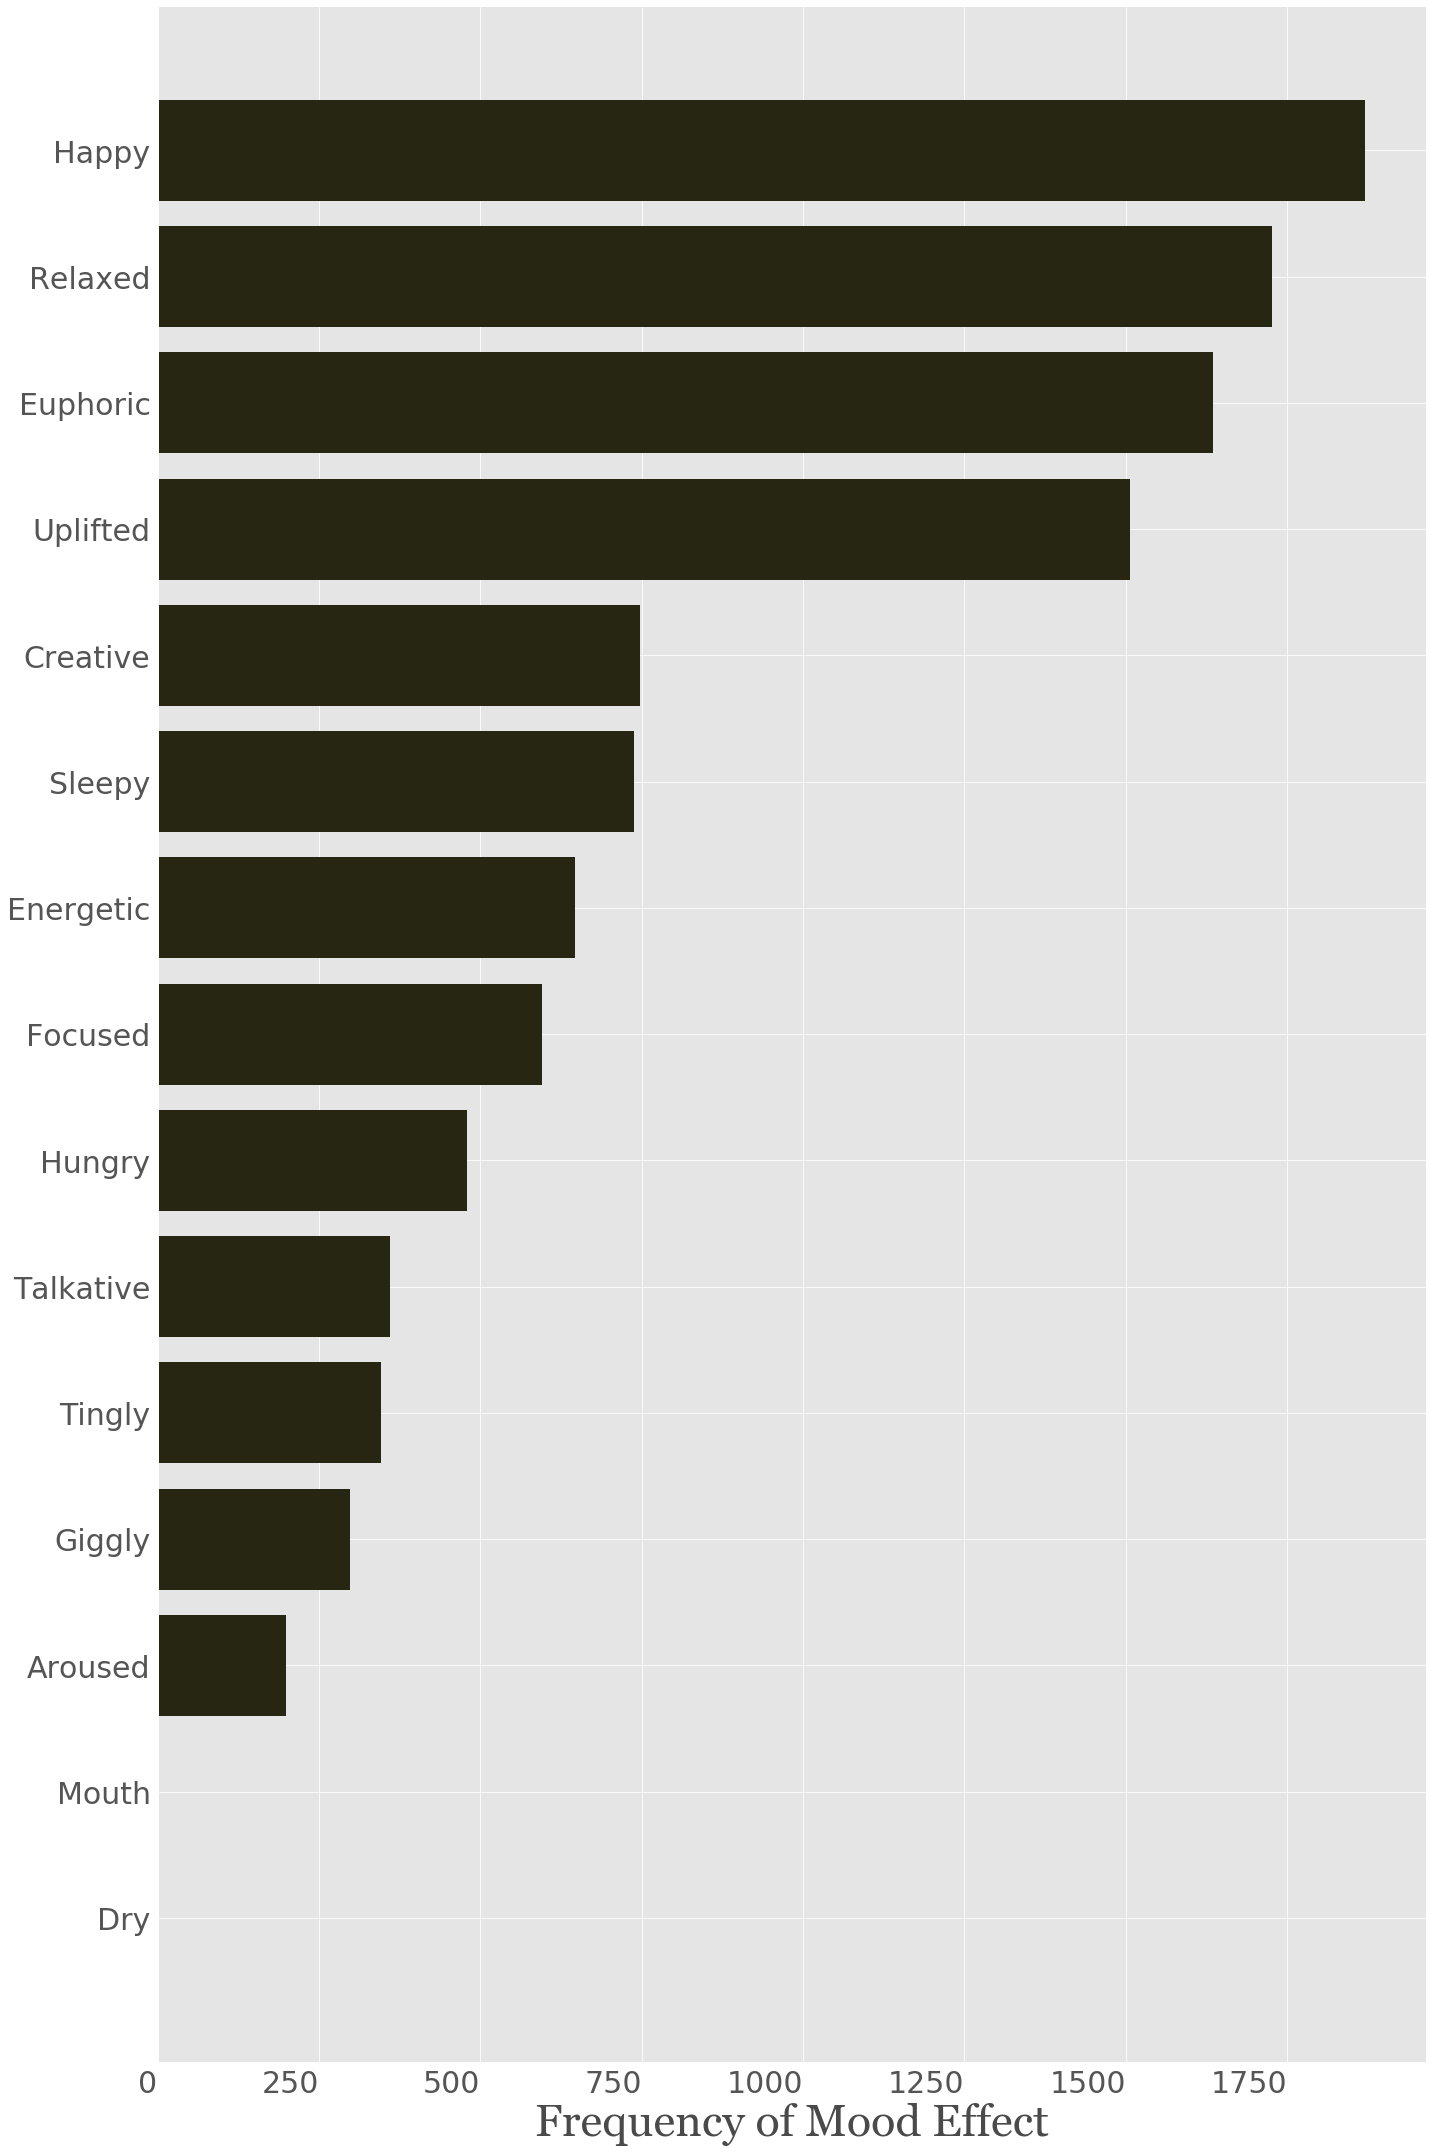

In [18]:
plt.rcParams['figure.figsize'] = (20, 30)

# Set subplot
fig, ax = plt.subplots()

colors = ["#272612"]

bars = ax.barh(
    y = np.arange(15),
    width = mood_df["Count"].sort_values(ascending = True),
    tick_label = moodlist, color=colors
)

# Axis formatting
ax.tick_params(bottom=False, left=False, labelsize=30, labelleft=True)
ax.set_xlabel('Frequency of Mood Effect', fontname="Georgia", fontsize=45, color="#4A4A4A")
# ax.set_title('Frequency of Mood Effect Accross all Strains', fontname="Georgia", fontsize=45, color="#232323")
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# for bar in bars:
#     ax.text(bar.get_width()+70,
#         bar.get_y() + bar.get_height() / 2,
#         "%d%%"% ((bar.get_width()/11236)*100),
#         horizontalalignment='center',
#         color="black",
#         weight='bold',
#         fontsize= 30)

plt.tight_layout()
plt.savefig("img/visualizations/1.png")

In [19]:
flavor1 = canna_data["flavor1"].tolist()
flavor2 = canna_data["flavor2"].tolist()
flavor3 = canna_data["flavor3"].tolist()
flavor4 = canna_data["flavor4"].tolist()

In [20]:
aroma = flavor1 + flavor2 + flavor3 + flavor4

In [21]:
aroma_df = pd.DataFrame({"Aroma":aroma, "Count":aroma})

In [22]:
aroma_df = aroma_df.groupby("Aroma").count().sort_values(["Count"], ascending=False)
top15_aroma = aroma_df.iloc[0:15, :]

In [23]:
top15_aroma = top15_aroma.sort_values(["Count"], ascending=True)
top15_aroma

,Count
Aroma,
Grape,126
Blueberry,145
Tropical,153
Skunk,174
Lemon,190
Spicy/Herbal,226
Diesel,240
Woody,255
Flowery,267


In [24]:
aroma_df["Count"].sum()
aromalist = top15_aroma.index.tolist()

In [25]:
len(aromalist)

15

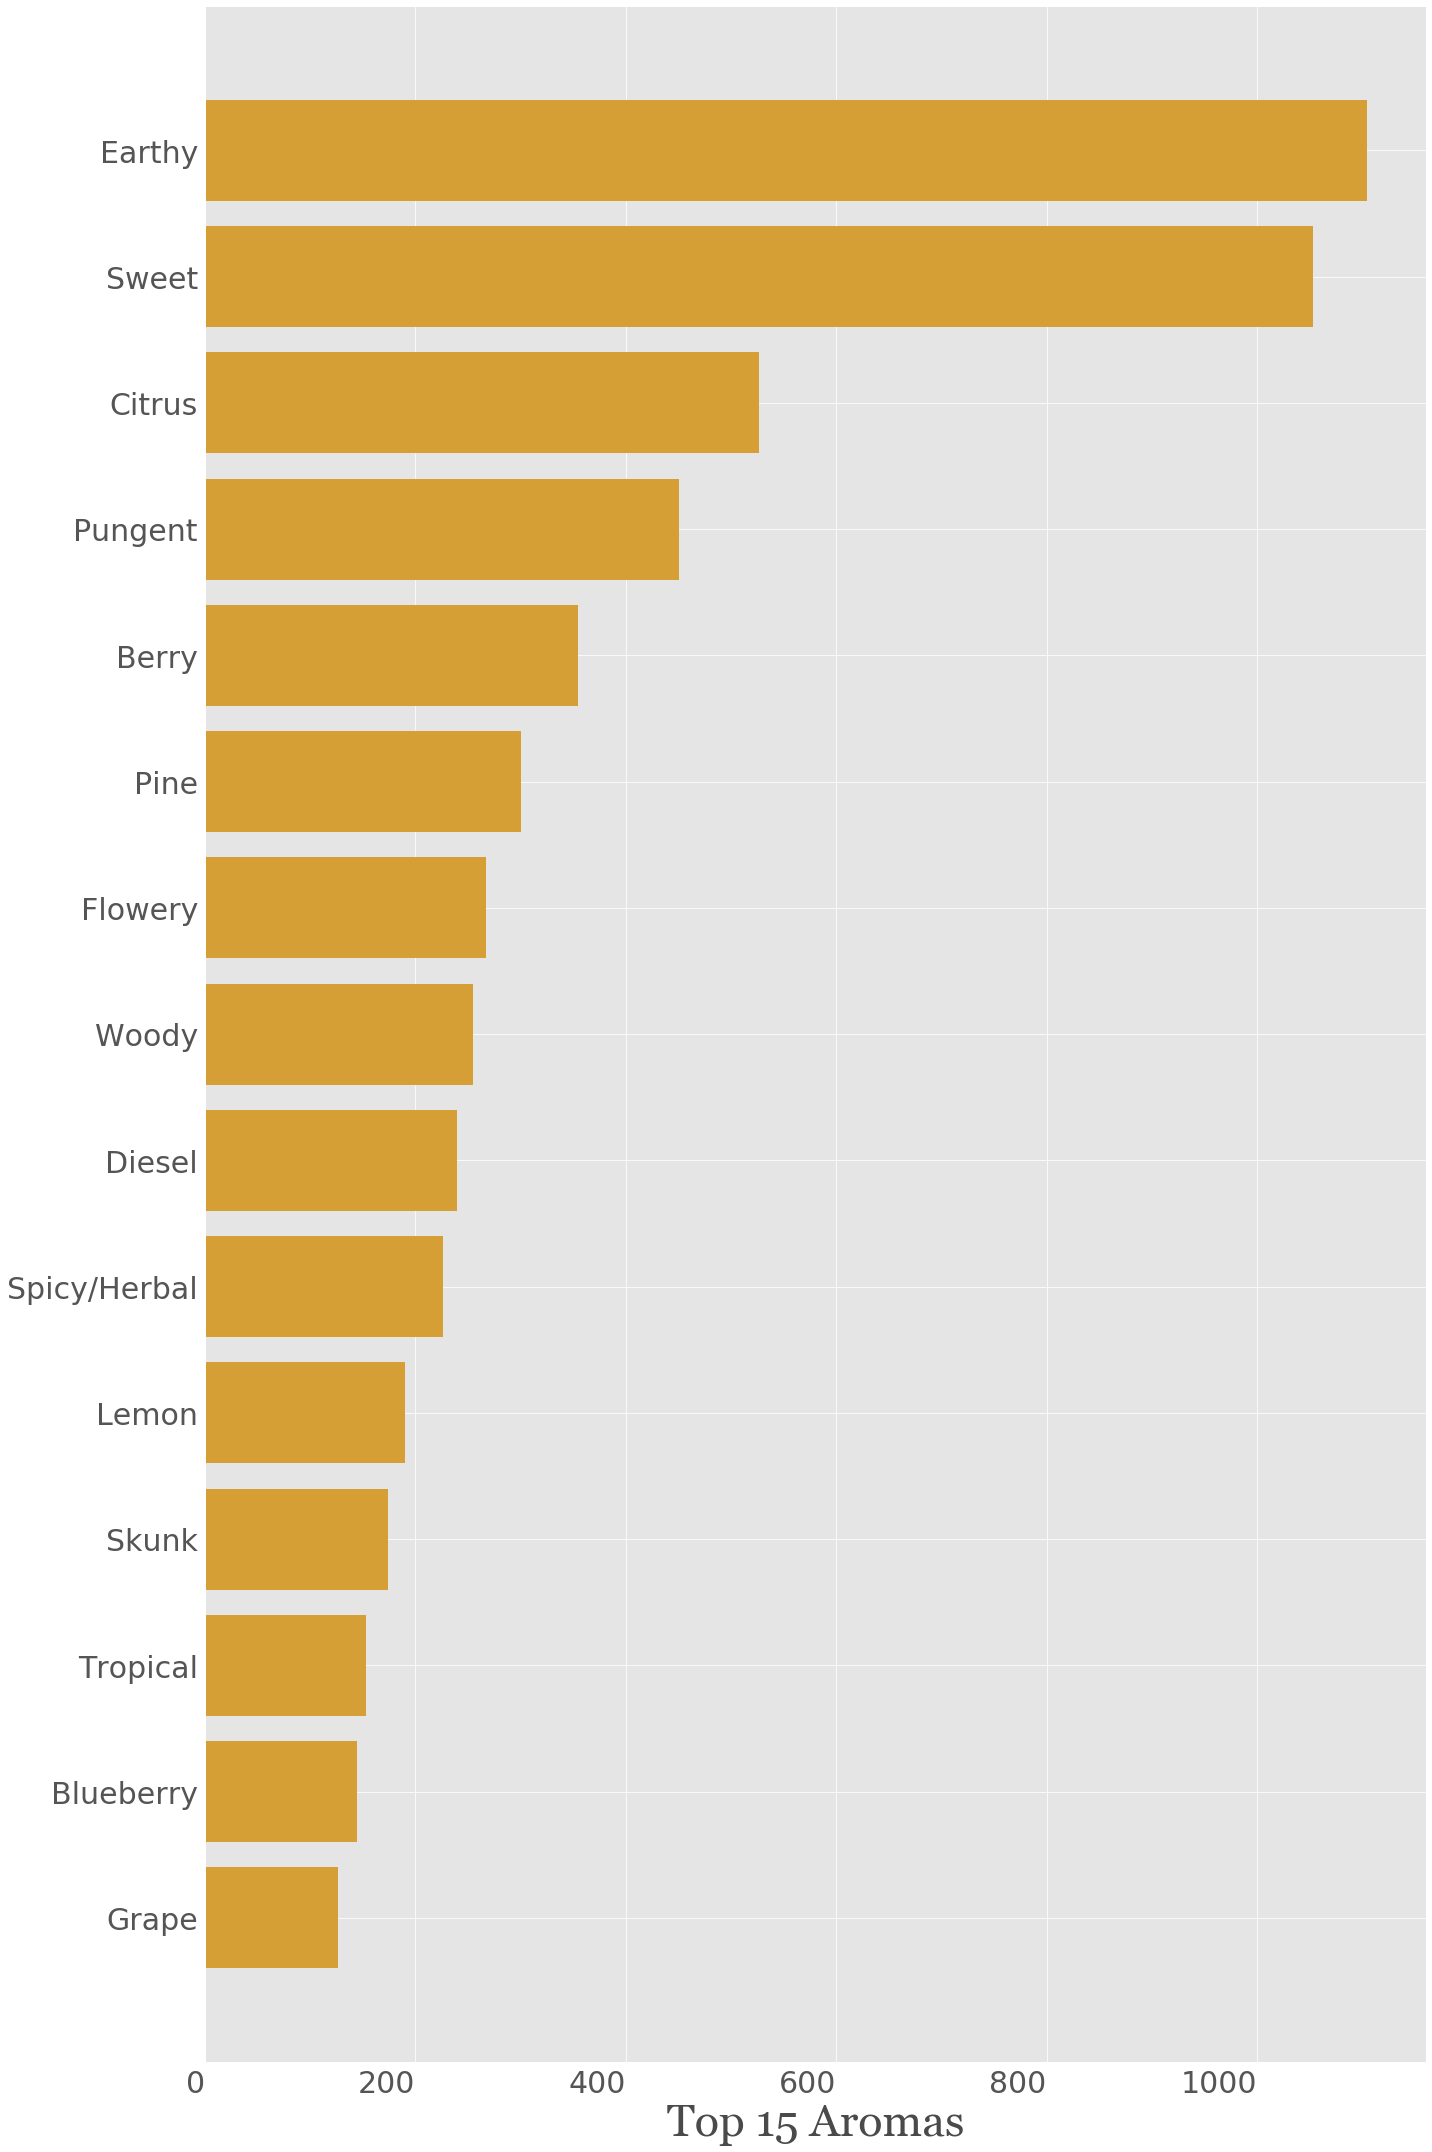

In [26]:
plt.rcParams['figure.figsize'] = (20, 30)

# Set subplot
fig, ax = plt.subplots()

colors = ["#D59F35"]

bars = ax.barh(
    y = np.arange(15),
    width = top15_aroma["Count"].sort_values(ascending = True),
    tick_label = aromalist, color=colors
)

# Axis formatting
ax.tick_params(bottom=False, left=False, labelsize=30, labelleft=True)
ax.set_xlabel('Top 15 Aromas', fontname="Georgia", fontsize=45, color="#4A4A4A")
# ax.set_title('Frequency of Aroma Accross all Strains', fontname="Georgia", fontsize=45, color="#232323")
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# for bar in bars:
#     ax.text(bar.get_width()+70,
#         bar.get_y() + bar.get_height() / 2,
#         "%d%%"% round((bar.get_width()/11236)*100),
#         horizontalalignment='center',
#         color="black",
#         weight='bold',
#         fontsize= 30)

plt.tight_layout()
plt.savefig("img/visualizations/2.png")

In [27]:
canna_data.head()

,strain,type,rating,description,effect1,effect2,effect3,effect4,effect5,flavor1,flavor2,flavor3,flavor4
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [28]:
ratingby_strain = canna_data[["type", "rating"]].set_index("type")
indica = ratingby_strain.loc["indica", "rating"].tolist()
hybrid = ratingby_strain.loc["hybrid", "rating"].tolist()
sativa = ratingby_strain.loc["sativa", "rating"].tolist()
ratingby_strain

,rating
type,
hybrid,4.0
hybrid,4.7
sativa,4.4
hybrid,4.2
hybrid,4.6
...,...
hybrid,4.7
indica,4.6
indica,5.0


In [29]:
strainlist = ratingby_strain.index.unique()
strainlist.tolist()

['hybrid', 'sativa', 'indica']

In [30]:
data = (hybrid, sativa, indica)

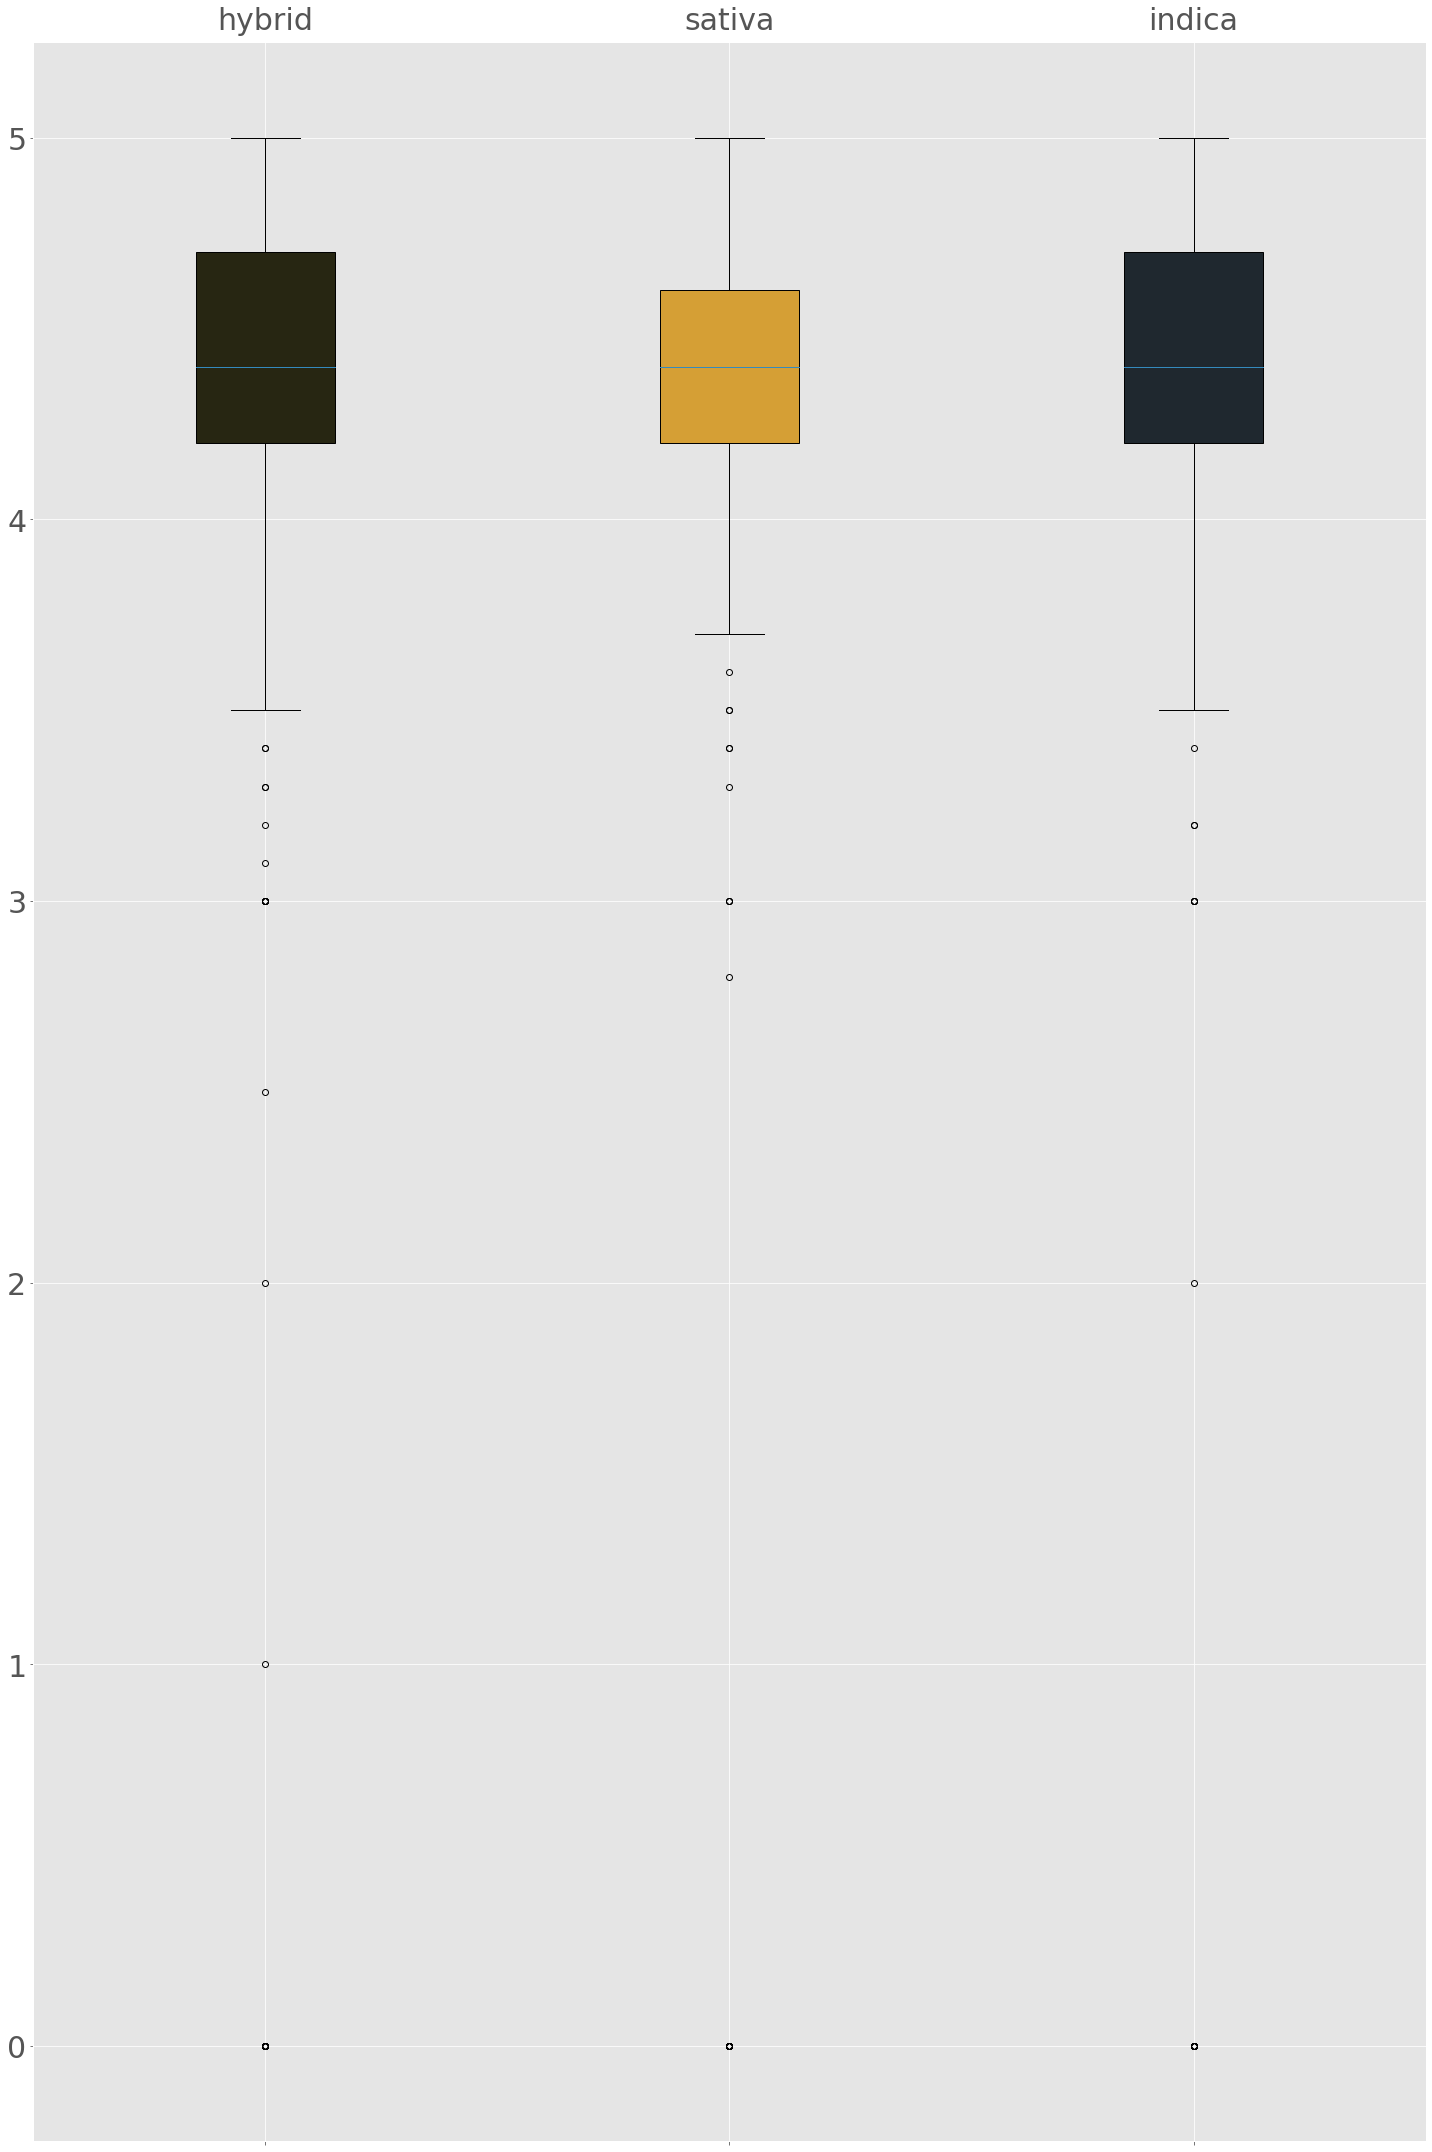

In [31]:

# Set subplot
fig, ax = plt.subplots()
box = ax.boxplot(data, vert=True, patch_artist=True, labels=strainlist)  
colors = ['#272612', '#D59F35', '#1F282F']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# Axis formatting
ax.tick_params(labelbottom=False, labeltop=True, labelsize=30, labelleft=True)

plt.tight_layout()
plt.savefig("img/visualizations/bplot.png")

In [32]:
canna_data["type"].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [33]:
rating_effect = canna_data.groupby("effect1").mean()

In [36]:
rating_effect = rating_effect.sort_values("rating", ascending=True)
rating_effect = rating_effect.drop(index="None")
effectlist = rating_effect.index.tolist()
len(effectlist)

14

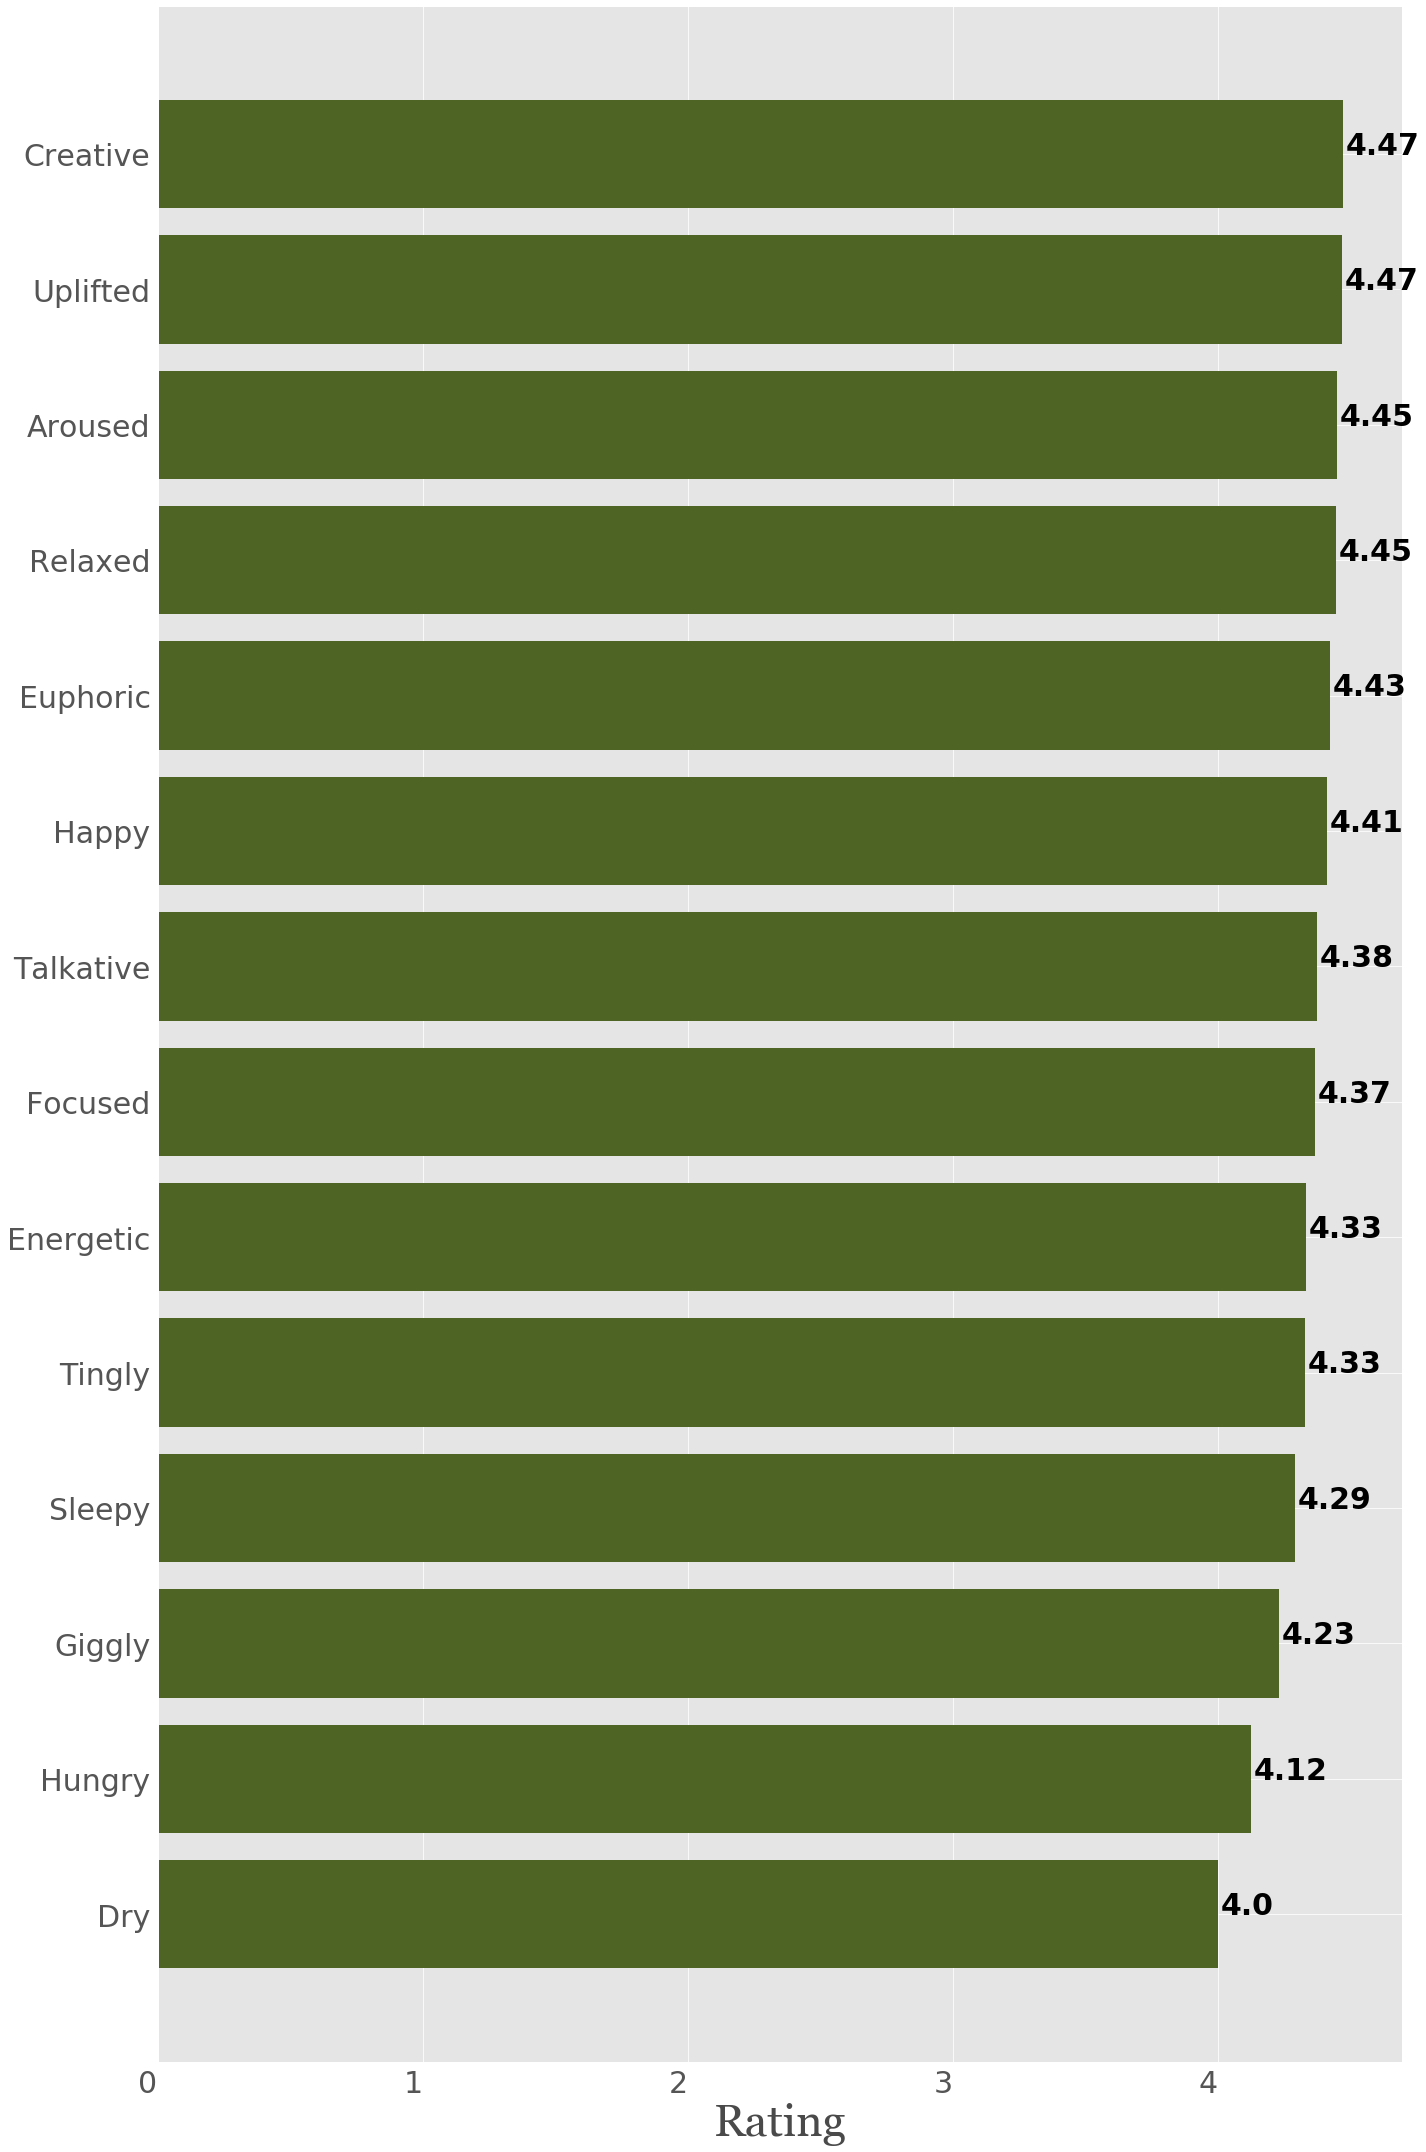

In [41]:
plt.rcParams['figure.figsize'] = (20, 30)

# Set subplot
fig, ax = plt.subplots()

colors = ["#4E6424"]

bars = ax.barh(
    y = np.arange(14),
    width = rating_effect["rating"].sort_values(ascending = True),
    tick_label = effectlist, color=colors
)

# Axis formatting
ax.tick_params(bottom=False, left=False, labelsize=30, labelleft=True)
ax.set_xlabel('Rating', fontname="Georgia", fontsize=45, color="#4A4A4A")
# ax.set_title('Frequency of Mood Effect Accross all Strains', fontname="Georgia", fontsize=45, color="#232323")
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
for bar in bars:
    ax.text(bar.get_width()+.01,
        bar.get_y() + bar.get_height() / 2,
        round(bar.get_width(), 2),
        color="black",
        weight='bold',
        fontsize= 30)
    
plt.tight_layout()
plt.savefig("img/visualizations/3.png")

In [38]:
rating_aroma = canna_data.groupby("flavor1").mean()
rating_aroma = rating_aroma.drop(index = "None")
rating_aroma = rating_aroma.sort_values("rating", ascending=False)
top15_aromaeffect = rating_aroma.iloc[0:15, :]

In [39]:
top15_aromaeffect = top15_aromaeffect.sort_values("rating", ascending=True)
aelist = top15_aromaeffect.index.tolist()
aelist

['Earthy',
 'Sage',
 'Blueberry',
 'Pine',
 'Pungent',
 'Lavender',
 'Tar',
 'Rose',
 'Lime',
 'Violet',
 'Menthol',
 'Minty',
 'Ammonia',
 'Pear',
 'Tea']

In [1]:
plt.rcParams['figure.figsize'] = (20, 30)

# Set subplot
fig, ax = plt.subplots()

colors = ["#DD855F"]

bars = ax.barh(
    y = np.arange(15),
    width = top15_aromaeffect["rating"].sort_values(ascending = True),
    tick_label = aelist, color=colors
)

# Axis formatting
ax.tick_params(bottom=False, left=False, labelsize=30, labelleft=True)
ax.set_xlabel('Rating', fontname="Georgia", fontsize=45, color="#4A4A4A")
# ax.set_title('Frequency of Mood Effect Accross all Strains', fontname="Georgia", fontsize=45, color="#232323")
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
for bar in bars:
    ax.text(bar.get_width()+.01,
        bar.get_y() + bar.get_height() / 2,
        round(bar.get_width(), 2),
        color="black",
        weight='bold',
        fontsize= 30)
    
plt.tight_layout()
plt.savefig("img/visualizations/4.png")

NameError: name 'plt' is not defined